<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

Импортируем все необходимые библиотеки в одном месте.

Теперь откроем все три датасета и ознакомимся с ними при помощи команд head и info.

In [ ]:
data = pd.read_csv('/datasets/gold_industry_full.csv', index_col = 'date')
display(data.head())
data.info()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_a_air                  

In [ ]:
train = pd.read_csv('/datasets/gold_industry_train.csv',index_col = 'date')
display(train.head())
display(train.info())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_a_air                  

None

In [ ]:
test = pd.read_csv('/datasets/gold_industry_test.csv',index_col = 'date')
display(test.head())
display(test.info())

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level           4859 non-null

None

In [ ]:
print('Размер полного датасета:', data.shape)
print('Размер обущающего датасета:', train.shape)
print('Размер тестового датасета:', test.shape)

Размер полного датасета: (19439, 86)
Размер обущающего датасета: (14579, 86)
Размер тестового датасета: (4860, 52)


По данным видно, что во всех трех датасетах есть пропуски во многих признаках.
Также в датасете test отсутствуют 34 столбца, которые есть в data и train.

Теперь проверим правильность расчета эффективности обогащения.

In [ ]:
def get_recovery(row):
    try:
        c = row['rougher.output.concentrate_au']
        f = row['rougher.input.feed_au']
        t = row['rougher.output.tail_au']
        row['our_recovery'] = ((c * (f - t)) / (f * (c - t))) * 100
    except error:
        return row
    return row

In [ ]:
train = train.apply(get_recovery,axis=1)
train[['rougher.output.recovery','our_recovery']]

,rougher.output.recovery,our_recovery
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
...,...,...
2017-12-09 09:59:59,87.684717,87.684717
2017-12-09 10:59:59,90.677361,90.677361
2017-12-09 11:59:59,89.574376,89.574376


In [ ]:
mae = mean_absolute_error(train['rougher.output.recovery'], train['our_recovery'])
'{0:.20f}'.format(mae)

'0.00000000000000983759'

Средняя абсолютная ошибка стремится к нулю, поэтому расчет произведен правильно. Теперь можем удалить ненужный столбец, который был создан для наглядности.

In [ ]:
train = train.drop('our_recovery', axis=1)

Теперь исследуем признаки, недоступные для тестовой выборки.

In [ ]:
another_columns = [i for i in train.columns if i not in test.columns]
another_columns

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

Отсутствующие признаки в основном - это tail и concentrate(выходные данные на разных этапах очистки). Скорее всего, эти данные нельзя получить из-за самого процесса производства, поэтому мы их не будем брать. Также их нужно будет удалить из обучающей выборки, это я сделаю позже. Также отсутствуют оба целевых признака в тестовой выборке - rougher.output.recovery и final.output.recovery. Их я добавлю также позже.

ТЕПЕРЬ ПЕРЕЙДЕМ К ПРЕДОБРАБОТКЕ ДАННЫХ.

In [ ]:
display(train.duplicated().sum())
display(test.duplicated().sum())
display(data.duplicated().sum())

0

0

0

Дубликатов не обнаружено.

In [ ]:
data = data.ffill()
train = train.ffill()
test = test.ffill()

В условии сказано, что соседние по времени параметры часто похожи, поэтому заполним пропуски соседними значениями с помощью метода ffill. Благодаря этому методу происходит заполнение пропущенных значений в данных, при котором пропущенные значения заменяются ближайшими доступными значениями из предыдущих наблюдений.

ВЫВОД: В этой части задания я ознакомилась с данными в трех датасетах. Мной было выявлено, что во всех трех датасетах во многих признаках есть пропуски, в тестовом датасете отсутствует 34 признака, которые есть в полном и обучающем датасете. Я проверила правильность расчета эффективности обогащения при помощи подсчета MAE - ошибки в расчетах нет. Также исследовала неиспользованные в тестовом датасете признаки. Пропуски заменила во всех трех датасетах при помощи метода ffill.

## Анализ данных

ПЕРЕЙДЕМ К АНАЛИЗУ ДАННЫХ.

In [ ]:
metal_au = data[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
metal_ag = data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
metal_pb = data[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


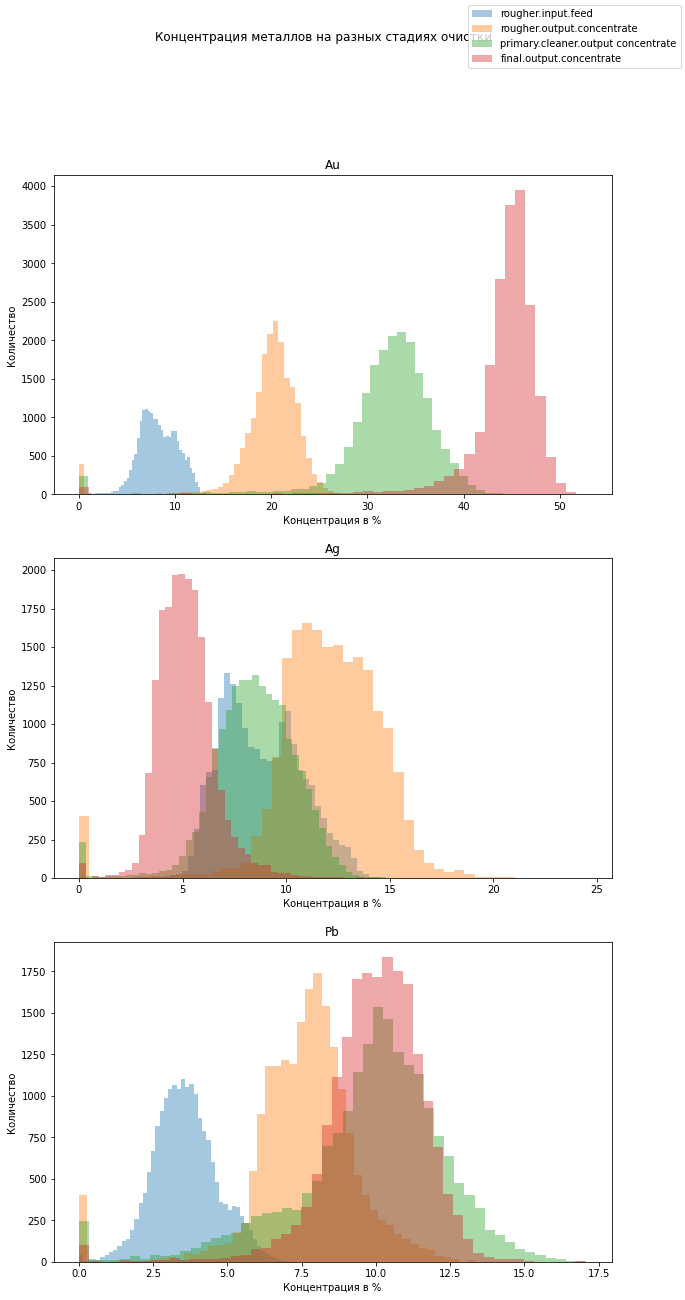

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
for column in list(metal_au):
    sns.distplot(metal_au[column], ax=axes[0], kde=False)
axes[0].set(title="Au", xlabel='Концентрация в %', ylabel='Количество')
for column in list(metal_ag):
    sns.distplot(metal_ag[column], ax=axes[1], kde=False)
axes[1].set(title="Ag", xlabel='Концентрация в %', ylabel='Количество')
for column in list(metal_pb):
    sns.distplot(metal_pb[column], ax=axes[2], kde=False)
axes[2].set(title="Pb", xlabel='Концентрация в %', ylabel='Количество')
fig.suptitle('Концентрация металлов на разных стадиях очистки')
fig.legend(['rougher.input.feed', 'rougher.output.concentrate', 'primary.cleaner.output concentrate', 'final.output.concentrate',])
fig.show()

Концентрация Au равномерно увеличивается на протяжении всей стадии очистки обработки. Концентрация Ag, наоборот, уменьшается на протяжении всех стадиях обработки. Концентрация Pb незначительно увеличивается, а потом остается на уровне первичной очистки.

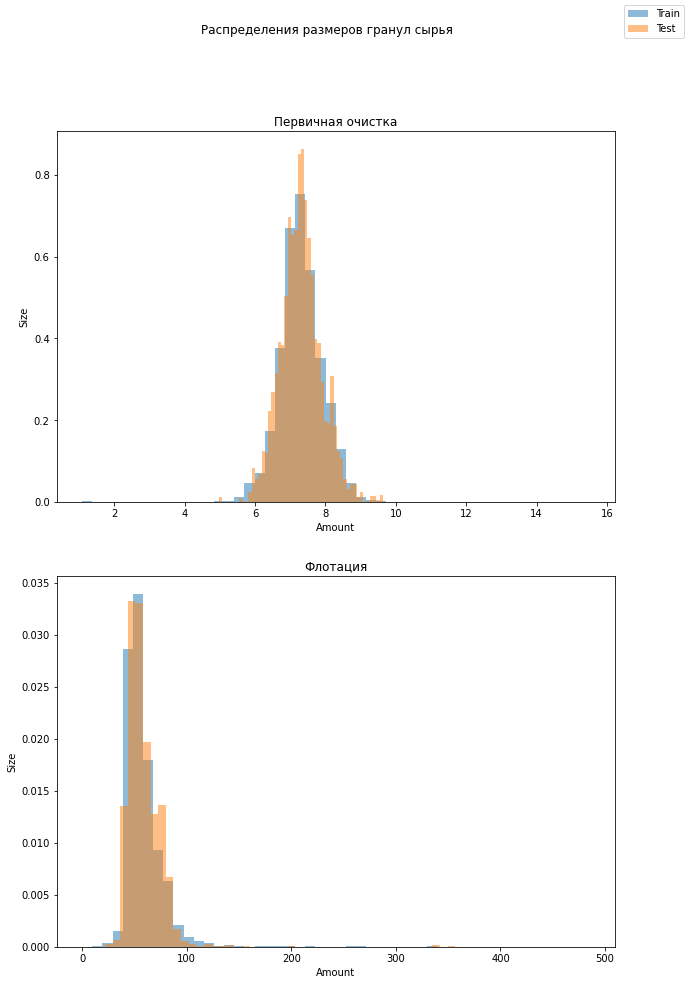

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 15))
axes[1].hist(train['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].hist(test['rougher.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[1].set(title='Флотация', xlabel='Amount', ylabel='Size')
axes[0].hist(train['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].hist(test['primary_cleaner.input.feed_size'], density=True, alpha=0.5, bins=50)
axes[0].set(title='Первичная очистка', xlabel='Amount', ylabel='Size')
fig.suptitle('Распределения размеров гранул сырья')
fig.legend(['Train', 'Test'])
fig.show()

Распределения размеров гранул сырья на обучающей и тестовой выборках выглядят похожими, поэтому оценка модели должна быть правильной.

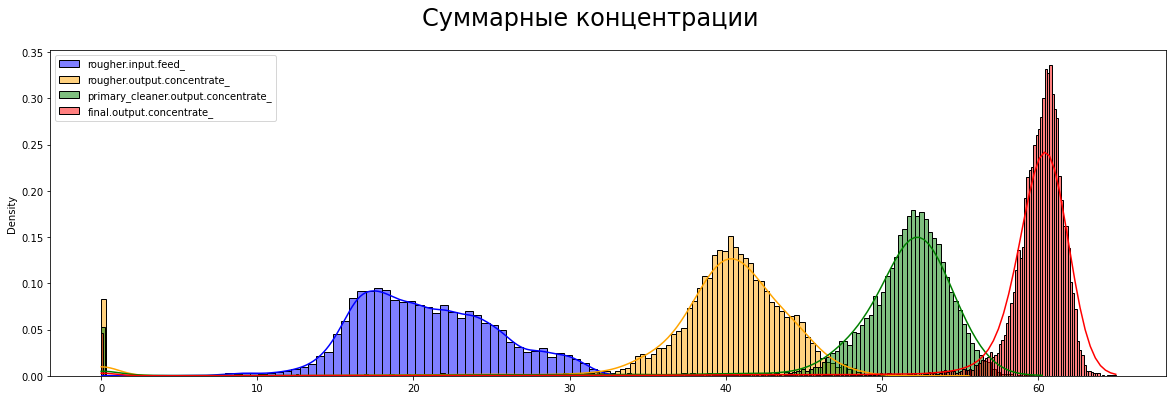

In [ ]:
stages_concentrate = ['rougher.input.feed_', 'rougher.output.concentrate_','primary_cleaner.output.concentrate_', 'final.output.concentrate_']
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Суммарные концентрации', fontsize=24)
colors = ['blue', 'orange', 'green', 'red']
for stage, color in zip(stages_concentrate, colors):
    sum_train = train[stage+ 'ag'] + train[stage+ 'au'] + train[stage+ 'pb']
    sns.histplot(sum_train.dropna(), label=stage, color=color, kde=True, stat="density", linewidth=1, ax=ax)
ax.legend()
plt.show()

Суммарная концентрация веществ увеличивается - это значит, что очистка от возможных примесей идет эффективно. Как видно на графиках, все распределения концентрации на различных стадиях показывают аномальные значения при 0. Уберем значения в нуле: будем считать всплеск в раойне 0 - аномалией. Сначала проверим количество пропусков.

In [ ]:
metals = ['au', 'ag', 'pb']
mask_df = [False]*data.shape[0]
mask_train = [False]*train.shape[0]
for stage in stages_concentrate:
    ax.set_title(stage)
    names = [stage+metal for metal in metals]

    mask_df = mask_df | (data[names].sum(axis=1) == 0)
    mask_train = mask_train | (train[names].sum(axis=1) == 0)

print(data[mask_df].shape)
print(train[mask_train].shape)

(591, 86)
(591, 86)


Удалим их во всех датасетах.

In [ ]:
test_mask = test.index.isin(data[mask_df].index)

In [ ]:
test = test.drop(test[test.index.isin(data[mask_df].index)].index)

train = train.drop(train[mask_train].index)

data =  data.drop(data[mask_df].index)

Проверим,что мы все сделали правильно.

In [ ]:
print(data.shape, train.shape, test.shape, sep='\n')
print(data.shape[0], train.shape[0] + test.shape[0])

(18848, 86)
(13988, 86)
(4860, 52)
18848 18848


ВЫВОД: В этом блоке заданий я исследовала данные в основном при помощи графиков.Я посмотрела как меняется концентрация металлов на различных этапах очистки(Au увеличивается, Ag снижается, Pb незначительно увеличивается). Сравнила распределение размеров гранул исходного сырья на обучающей и тестовой выборках - они оказались похожими. Исследовала суммарную концентрацию металлов на разных стадиях, очистка идет эффективно, нашла аномалии в значении 0, я их удалила.

## Модель

ИТОГОВАЯ ФУНКЦИЯ sMAPE:

In [ ]:
def sMAPE(target, predict):
    target = target.to_numpy()
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 0] - predict[y, 0]) / (abs(target[y, 0] + predict[y, 0]) / 2)
    sMAPE_1 = total / len(target) * 100

    total = 0
    for y in range(len(target)):
        total += abs(target[y, 1] - predict[y, 1]) / (abs(target[y, 1] + predict[y, 1]) / 2)
    sMAPE_2 = total / len(target) * 100

    return 0.25 * sMAPE_1 + 0.75 * sMAPE_2

In [ ]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

Параметр greater_is_better=False указывает на то, что чем меньше значение метрики, тем лучше качество модели.

Удалим из train недоступные для test признаки. Разделим датасеты на features и target для обучения модели.

In [ ]:
train_features = train.drop(another_columns, axis=1)
train_target = train[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
print(train_features.shape)
print(train_target.shape)

(13988, 52)
(13988, 2)


Сделали проверку.

In [ ]:
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)

Используем Scaler для обучения и масштабирования признаков на обучающей выборке.

In [ ]:
test_features = test
test_target = data[data.index.isin(test.index)][['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
print(test_features.shape)
print(test_target.shape)

(4860, 52)
(4860, 2)


In [ ]:
test_features = scaler.transform(test_features)

Также масштабируем для тестовой выборки.

Переходим к сравниванию моделей.

In [ ]:
model = LinearRegression()
scores = -1 * cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=5)
final_score = scores.mean()
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 8.868239156986029


Используем кроссвалидацию для модели линейной регрессии и считаем sMAPE. Делаем тоже самое для других моделей. Нас интересует модель с наименьшей метрикой sMAPE.

In [ ]:
best_depth_t = 0
final_score_b = 1000
for depth in tqdm(range(2, 12)):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = -1 * cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=5)
    final_score = scores.mean()
    if final_score < final_score_b:
        final_score_b = final_score
        best_depth_t = depth
tree_best = {'depth':best_depth_t}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████| 10/10 [00:18<00:00,  1.83s/it]

Средняя оценка качества модели: 8.654327841240328


In [ ]:
best_depth_f = 0
best_est_f = 0
final_score_b = 1000
for est in tqdm(range(10, 51, 10)):
    for depth in range (3, 10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores = -1 * cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=5)
        final_score = scores.mean()
        if final_score < final_score_b:
            final_score_b = final_score
            best_est_f = est
            best_depth_f = depth
forest_best = {'depth':best_depth_f, 'n_estimators':best_est_f}
print('Средняя оценка качества модели:', final_score_b)

100%|██████████| 5/5 [17:14<00:00, 206.97s/it]

Средняя оценка качества модели: 8.519714782589658


In [ ]:
forest_best

{'depth': 3, 'n_estimators': 50}

Чем меньше sMAPE, тем лучше качество модели, поэтому наилучшей себя показала модель RandomForestRegressor c параметрами depth = 3 и n_estimators = 50. Попробуем ее на тестовой выборке.

In [ ]:
model = RandomForestRegressor(random_state=12345,
                              n_estimators=forest_best['n_estimators'],
                              max_depth=forest_best['depth'])
model.fit(train_features, train_target)
predicted = model.predict(test_features)
sMAPE_test = sMAPE(test_target, predicted)
print('Итоговый sMAPE на тестовой выборке:', sMAPE_test)

Итоговый sMAPE на тестовой выборке: 7.450062697489406


Проведем проверку на константной модели.

In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features,train_target)
predicted_dummy = dummy_regr.predict(test_features)

sMAPE_dummy = sMAPE(test_target, predicted_dummy)
print('Итоговый sMAPE на константной модели:', sMAPE_dummy)

Итоговый sMAPE на константной модели: 8.472648251321264


Итоговый sMAPE на тестовой выборке - 7.45. Проверка адекватности модели - sMAPE при DummyRegressor - 8.47.
Модель на тестовой выборке превосходит константную модель по медиане. Значит такую модель можно использовать.

ОБЩИЙ ВЫВОД: Был проделан большой путь. Еще раз напомню, что было сделано.

- Внимательно ознакомилась с данными.

- Проверила, что эффективность обогащения рассчитана правильно, т.к. MAE между нашими расчётами и значением признака стремится к нулю.

- В тестовой выборке отсутствуют признаки, которые невозможно получить из-за технологического процесса (tail, concentrate, некоторые calculation и output). Также в тестовой выборке отсутствовали целевые признаки.

- Проверила отсутствие дубликатов и заменила пропуски во всех трех датасетах с помощью метода ffill.

- Проанализировала изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки. На финальной стадии очень много выбросов. Больше всего выбросов наблюдается у золота как на первычной очистке, так и на финальной очистке. Еще можно выделить возрастание концентрации золота на финальной очистке.

- При сравнении распределения размеров гранул сырья на обучающей и тестовой выборках выявила, что распределение обучающей и тестовой выборки можно считать близкими по значению, они практически совпадают.

- Исследовала суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Суммарная концентрация веществ увеличивается с течением процесса обогащения, т.к. при обработке вымываются лишние примеси.

- Написала функцию для вычисления sMAPE.

- Подобрала лучшую модель,оценила ее качество кросс-валидацией и сравнила с константной моделью. Лучшая модель - RandomForestRegression с параметрами depth = 3 и n_estimators = 50.